In [ ]:
import requests 
import pandas as pd
import numpy as np
from numpy.ma.core import true_divide
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import cross_val_score

# Explantive Synopsis

The data I have chose shows Anemia prevalence by location, GDP and Median Income. Most of the data I've coded show the relevance between GDP and Anemia, as well as their Median income to see how it plays a part. Based off the the graphs I have made; It can be inferred that Anemia can be seen more prevelant in 3rd world countries with lower GDP and especially in areas that the median income per person is very low, this is probaby due to the inability to get medicince or proper medical attention. The samples are a little  lacking in some countries but a lot can be gathered based off what is provided. 

# Data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/SethR404/Kidder/main/anemia_median_income_gdp.csv')
data.rename(columns={'Anemia': 'Anemia Prevelance', 'Medinc': 'DMI', 'GDPPPP': 'GDP(PPP)'}) #DMI = Daily Median Income, GDP PPP per capita (per thousand, international $)


,Unnamed: 0,Location,ParentLocation,Year,Anemia Prevelance,DMI,GDP(PPP)
0,1,Albania,Europe,2019,24.8,7.57,14.34
1,2,Algeria,Africa,2019,33.3,8.01,12.01
2,3,Angola,Africa,2019,44.5,1.84,6.95
3,4,Armenia,Europe,2019,17.3,5.87,14.23
4,5,Australia,Western Pacific,2019,8.5,48.73,52.03
...,...,...,...,...,...,...,...
128,130,Uruguay,Americas,2019,15.0,20.36,24.01
129,131,Uzbekistan,Europe,2019,24.8,3.74,7.66
130,132,Vanuatu,Western Pacific,2019,28.5,3.68,3.27
131,133,Zambia,Africa,2019,31.5,1.51,3.62


In [ ]:
data.agg({'Anemia':['mean', 'min', 'max'], 'Medinc':['mean', 'min', 'max'], 'GDPPPP': ['mean', 'min', 'max']})


,Anemia,Medinc,GDPPPP
mean,27.380451,15.314511,19.949098
min,7.400000,1.110000,0.780000
max,59.000000,84.890000,119.420000


In [ ]:
data.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    38.770076
Year           0.000000
Anemia        12.591745
Medinc        16.949160
GDPPPP        20.932627
dtype: float64

# Plots


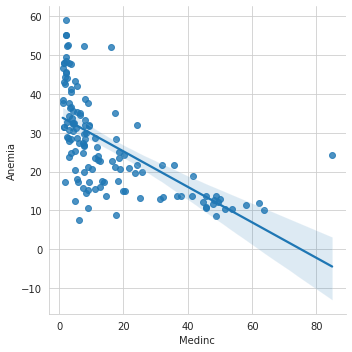

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x ='Medinc', y ='Anemia', data = data)

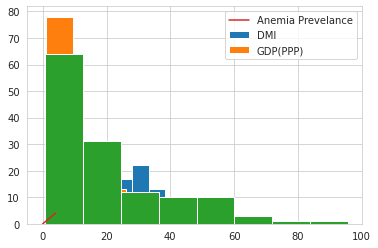

In [ ]:

ax = plt.hist(data['Anemia'])
ax = plt.hist(data['Medinc'])
ax = plt.hist(data['GDPPPP'])
plt.plot(range(5))
plt.xlim(-5,100)
plt.legend(['Anemia Prevelance', 'DMI', 'GDP(PPP)'])



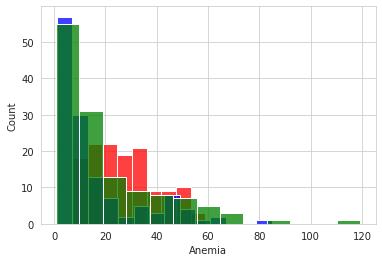

In [ ]:
Anem = sns.histplot(data=data["Anemia"] , color="red", label="Anemia Prev.")
Med = sns.histplot(data=data["Medinc"] , color="blue", label="DMI")
GDP = sns.histplot(data=data["GDPPPP"] , color="green", label="GDP(PPP)")

In [ ]:
data.dtypes

Unnamed: 0          int64
Location           object
ParentLocation     object
Year                int64
Anemia            float64
Medinc            float64
GDPPPP            float64
dtype: object

In [ ]:
X = data[['Anemia']]
Y = data['GDPPPP']
lm = LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]



array([22.67927419, 13.68607934,  1.8362226 , 30.61444612, 39.92504784])

In [ ]:
lm.intercept_

48.918242690709334

In [ ]:
lm.coef_

array([-1.05802292])

(0.0, 63.05401574600043)

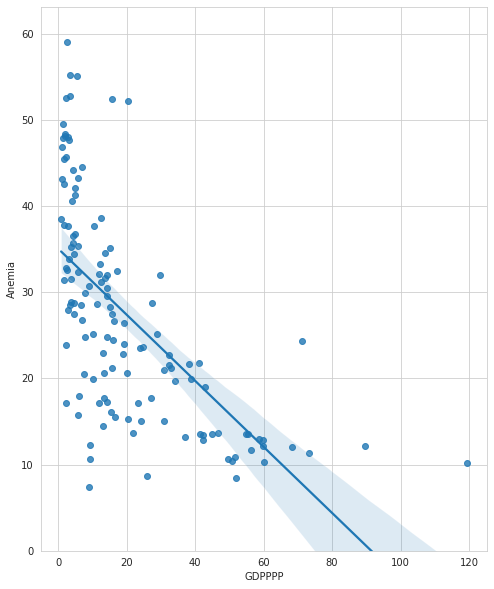

In [ ]:
width =8
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="GDPPPP", y="Anemia", data=data)
plt.ylim(0,)

(0.0, 62.608134739364445)

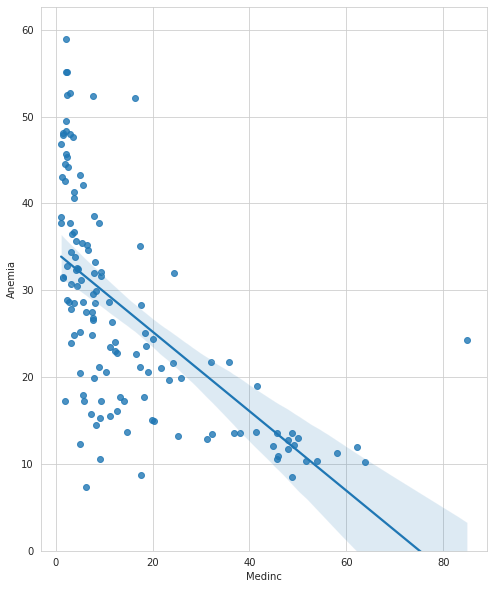

In [ ]:
width =8
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Medinc", y="Anemia", data=data)
plt.ylim(0,)

# Data from Worksheets

In [ ]:
lm1 = LinearRegression()
vari = data[['Anemia', 'Medinc']]
lm1.fit(vari, data['GDPPPP'])
lm1.intercept_

7.120328907963399

In [ ]:
lm1.coef_

array([-0.14629274,  1.09924043])

In [ ]:
lm2 = LinearRegression()
lm2.fit(data[['GDPPPP', 'Medinc']],data['Anemia'])
lm2.coef_


array([-0.30310398, -0.10428924])

In [ ]:
lm2.intercept_

35.02424078664071

In [ ]:
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4050554969706295


In [ ]:
print('The R-square is: ', lm1.score(vari, Y))

The R-square is:  0.8964689181780416


In [ ]:
print('The R-square is: ', lm2.score(data[['GDPPPP', 'Medinc']], Y))

The R-square is:  -1.0400131855452606


In [ ]:
data.groupby(data['Location']).describe()

Unnamed: 0                                                Year  \
                count   mean std    min    25%    50%    75%    max count   
Location                                                                    
Albania           1.0    1.0 NaN    1.0    1.0    1.0    1.0    1.0   1.0   
Algeria           1.0    2.0 NaN    2.0    2.0    2.0    2.0    2.0   1.0   
Angola            1.0    3.0 NaN    3.0    3.0    3.0    3.0    3.0   1.0   
Armenia           1.0    4.0 NaN    4.0    4.0    4.0    4.0    4.0   1.0   
Australia         1.0    5.0 NaN    5.0    5.0    5.0    5.0    5.0   1.0   
...               ...    ...  ..    ...    ...    ...    ...    ...   ...   
Uruguay           1.0  130.0 NaN  130.0  130.0  130.0  130.0  130.0   1.0   
Uzbekistan        1.0  131.0 NaN  131.0  131.0  131.0  131.0  131.0   1.0   
Vanuatu           1.0  132.0 NaN  132.0  132.0  132.0  132.0  132.0   1.0   
Zambia            1.0  133.0 NaN  133.0  133.0  133.0  133.0  133.0   1.0   
Zimbabwe          1.0  134.0 NaN  134.0  134.0  134.0  134.0  134.0   1.0   

                    ... Medinc        GDPPPP                                  \
              mean  ...    75%    max  count   mean std    min    25%    50%   
Location            ...                                                        
Albania     2019.0  ...   7.57   7.57    1.0  14.34 NaN  14.34  14.34  14.34   
Algeria     2019.0  ...   8.01   8.01    1.0  12.01 NaN  12.01  12.01  12.01   
Angola      2019.0  ...   1.84   1.84    1.0   6.95 NaN   6.95   6.95   6.95   
Armenia     2019.0  ...   5.87   5.87    1.0  14.23 NaN  14.23  14.23  14.23   
Australia   2019.0  ...  48.73  48.73    1.0  52.03 NaN  52.03  52.03  52.03   
...            ...  ...    ...    ...    ...    ...  ..    ...    ...    ...   
Uruguay     2019.0  ...  20.36  20.36    1.0  24.01 NaN  24.01  24.01  24.01   
Uzbekistan  2019.0  ...   3.74   3.74    1.0   7.66 NaN   7.66   7.66   7.66   
Vanuatu     2019.0  ...   3.68   3.68    1.0   3.27 NaN   3.27   3.27   3.27   
Zambia      2019.0  ...   1.51   1.51    1.0   3.62 NaN   3.62   3.62   3.62   
Zimbabwe    2019.0  ...   2.36   2.36    1.0   3.78 NaN   3.78   3.78   3.78   

                          
              75%    max  
Location                  
Albania     14.34  14.34  
Algeria     12.01  12.01  
Angola       6.95   6.95  
Armenia     14.23  14.23  
Australia   52.03  52.03  
...           ...    ...  
Uruguay     24.01  24.01  
Uzbekistan   7.66   7.66  
Vanuatu      3.27   3.27  
Zambia       3.62   3.62  
Zimbabwe     3.78   3.78  

[133 rows x 40 columns]

In [ ]:
US = data[data['ParentLocation'] =='America'] #https://www.kaggle.com/code/tkuroki/correlations-and-linear-regression-model-training

In [ ]:
y_data = data['Anemia']
x_data = data.drop('Anemia', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 67
number of training samples: 66


In [ ]:
lre = LinearRegression()
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.50, random_state=0)
lre.fit(x_train1[['GDPPPP']],y_train1)
lre.score(x_test1[['GDPPPP']],y_test1)

0.36606379520017174

In [ ]:
Rcross = cross_val_score(lre, x_data[['GDPPPP']], y_data, cv=4)
Rcross

array([0.46389416, 0.37925356, 0.29480055, 0.39359141])

In [ ]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.3828849212266134 and the standard deviation is 0.06010234797731327


In [ ]:
-1 * cross_val_score(lre,x_data[['GDPPPP']], y_data,cv=4,scoring='neg_mean_squared_error')

array([ 90.76756428,  92.12742457, 137.91141993,  64.00383759])

In [ ]:
lr = LinearRegression()
lr.fit(x_train[['GDPPPP', 'Medinc']], y_train)

LinearRegression()

In [ ]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['GDPPPP']])
x_test_pr = pr.fit_transform(x_test[['GDPPPP']])
pr

PolynomialFeatures(degree=5)

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([38.3861048 , 15.53040377, 33.9823146 , 13.71797658, 31.04123725])

In [ ]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [38.3861048  15.53040377 33.9823146  13.71797658]
True values: [59.  21.7 18.  13. ]


# Selected Graph

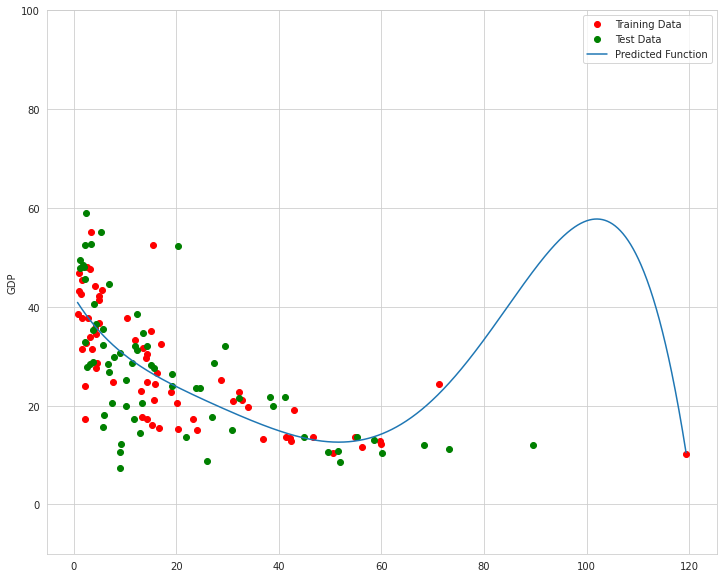

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10, 100])
    plt.ylabel('GDP')
    plt.legend()

PollyPlot(x_train[['GDPPPP']], x_test[['GDPPPP']], y_train, y_test, poly,pr)
